In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

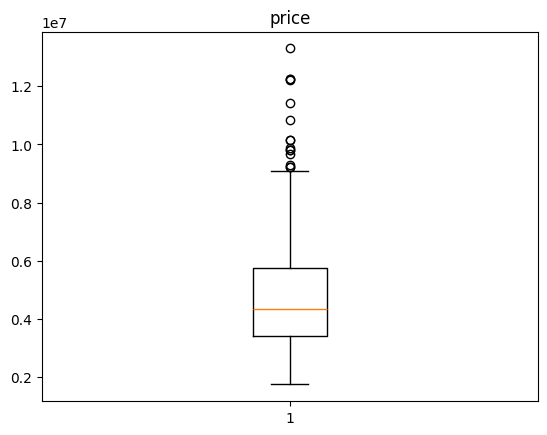

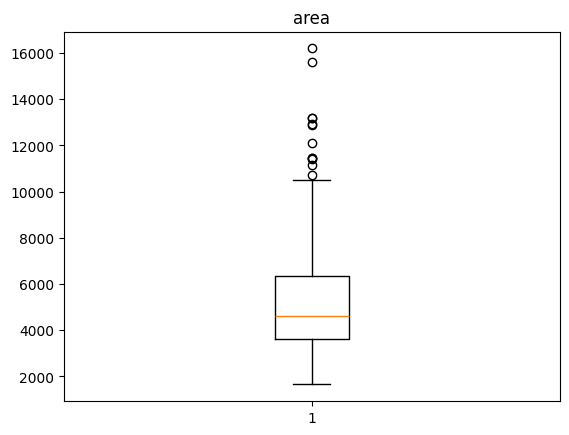

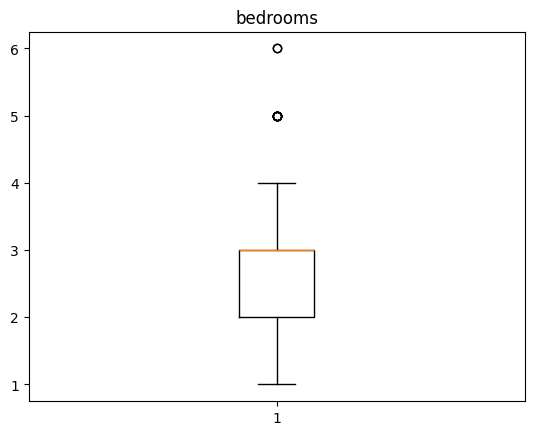

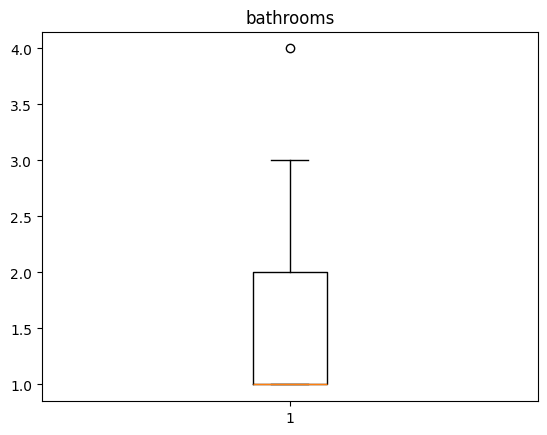

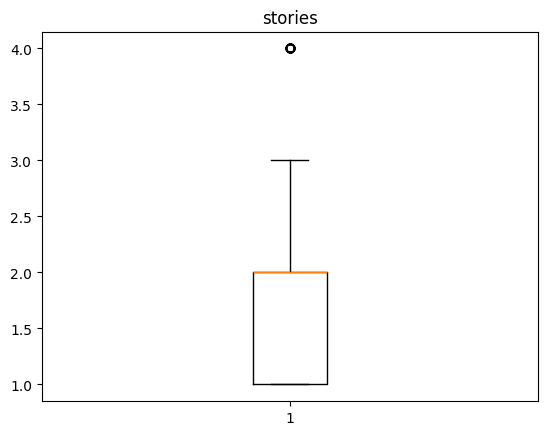

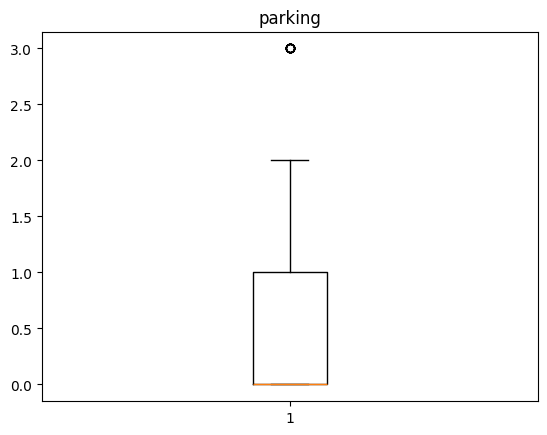

In [5]:
for col in df.select_dtypes(include='number').columns:
    plt.figure()  # Optional: creates a new figure for each boxplot
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [6]:
lower=df["area"].quantile(0.05)
upper=df["area"].quantile(0.95)
df['area']=np.clip(df["area"],lower,upper)

In [7]:
lower=df["price"].quantile(0.05)
upper=df["price"].quantile(0.95)
df['price']=np.clip(df["price"],lower,upper)

In [8]:
# Select multiple columns for X
x=df[["area","bedrooms","bathrooms","stories","parking"]] #must be 2D
y=df["price"]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=model.predict(x_test)

In [12]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mse: ",mse)
print("r2: ",r2)

mse:  1551806394120.579
r2:  0.5479021059523925


In [13]:
model.coef_[0]

375.4756846535874

In [14]:
model.intercept_

127954.80432560295

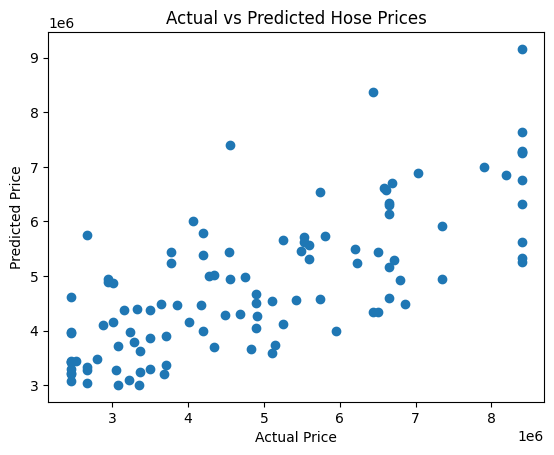

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price") #least square line cannot be plotted for multiple features
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Hose Prices")
plt.show()